# Lista 03 - ICs + Bootstrap

In [46]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados de recém-nascidos disponibilizada no exercício.

In [47]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386703,279.101363,27.228279,1.626855,3.642307
std,0.519609,16.010305,5.817839,0.064163,0.587807
min,1.559222,148.000000,15.000000,1.346200,2.466407
25%,3.061746,272.000000,23.000000,1.574800,3.238930
50%,3.401940,280.000000,26.000000,1.625600,3.543687
75%,3.713785,288.000000,31.000000,1.676400,3.940580
max,4.989512,353.000000,45.000000,1.828800,7.087375


A) Plote uma PDF dos dados da coluna "Gestational Days".

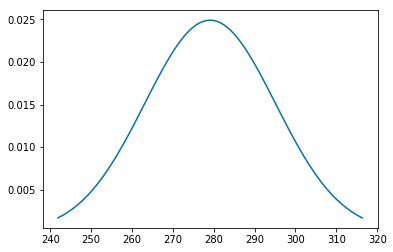

In [48]:
from scipy.stats import norm
from statistics import *
(fig, axis) = plt.subplots(1, 1)
col = df['Gestational Days']
sup = norm.ppf(0.99, mean(col), stdev(col))
inf = norm.ppf(0.01, mean(col), stdev(col))
x = np.linspace(inf, sup, 100)
axis.plot(x, norm.pdf(x, mean(col), stdev(col)))
plt.show()


B) Para o número de dias de gestação, determine com 95% de o Intervalo de Confiança. Não utilize a técnica de bootstrap.

Retorne uma lista com os valores inferior e superior do intervalo de confiança.
Exemplo:
```python
return [inferior,superior]
```

In [49]:
def calcula_IC_gestacao(df):
    col = df['Gestational Days']
    tam = len(col)
    ab1 = np.std(col, ddof = 1)
    ab2 = ab1 / np.sqrt(tam)
    media = np.mean(col)
    inferior = media - 1.96*ab2
    superior = media + 1.96*ab2
    return [inferior, superior]

C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: A média da amostra está com 95% de probabilidade dentro do intervalo
    2: 95% dos valores da população estão dentro do intervalo
    3: O intervalo inclui a média da população com 95% de probabilidade
    4: 5% da amostra está a mais que 1.96 de distância da média da população
    5: Nenhuma das anteriores

In [50]:
def resposta():
    return 3

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando bootstrap.

A) Para a coluna "Maternal Age", plote um histograma dos valores.

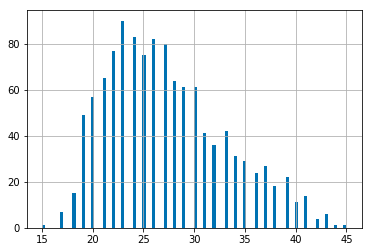

In [51]:
df['Maternal Age'].hist(bins = 100)

B) Utilizando o mesmo atributo, execute um bootstrap com 5000 amostras e plote a distribuição das medianas.

(array([7.926, 0.   , 0.   , 0.   , 0.   , 0.176, 0.   , 0.   , 0.   ,
        1.898]),
 array([26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27. ]),
 <a list of 10 Patch objects>)

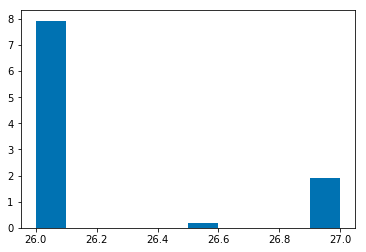

In [52]:
medians = np.zeros(5000)
col = df['Maternal Age']
for i in range(5000):
    sample = col.sample(len(df.index), replace= True )
    medians[i] = sample.median()
plt.hist(medians, density = True)

# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

In [53]:
dados = pd.read_csv('lista.csv')['valores']

A) Calcule a média, mediana, variância, e desvio padrão. Retorne em uma lista da seguinte forma:
```python
return [media,mediana,var,desvio]
```

In [54]:
def ex3(dados):
    media = np.mean(dados)
    mediana = np.median(dados)
    var = np.var(dados)
    std = np.std(dados)
    return[media, mediana, var, std]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne em uma lista da seguinte forma:
```python
return [inferior,superior]
```

In [55]:
def ex3_IC(dados):
    tam = len(dados)
    ab = np.std(dados) / np.sqrt(tam)
    media = np.mean(dados)
    superior = media + 1.96*ab
    inferior = media - 1.96*ab
    return[inferior, superior]

C) Plote a distribuição dos valores dos dados, em escala log-log. 

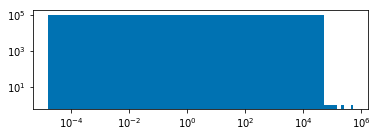

In [56]:
lista = list(dados)
lista.sort()
plt.subplot(2,1,1)
plt.hist(lista)
plt.xscale('log')
plt.yscale('log')
plt.show()

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

A escala logarítmica é boa para melhorar a visualização dos dados. Para isso, ela dá ênfase para os valores e isso pode ocasionar uma elevação exagerada dos mesmos. No caso da questão, os valores ficaram tão elevados devido a esse tipo de representação.